In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle
%matplotlib inline

In [4]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

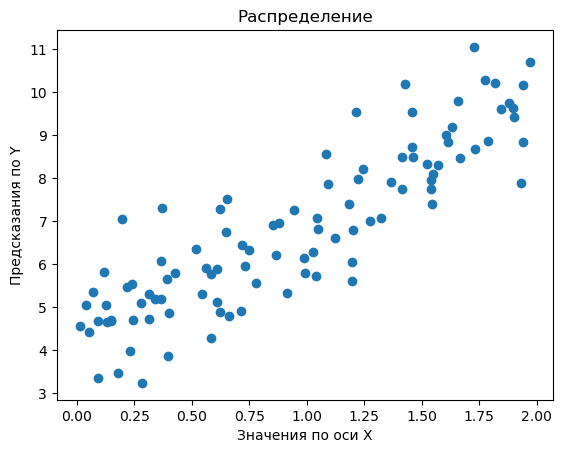

In [25]:
plt.scatter(X, Y)
plt.title("Распределение")
plt.xlabel("Значения по оси X")
plt.ylabel("Предсказания по Y")
plt.show()

In [8]:
my_model = LinearRegression()
my_model.fit(X, Y)

LinearRegression()

In [10]:
print(f"Коеффициент w1: {np.round(my_model.coef_[0][0], 2)}")
print(f"Интерсепт: {np.round(my_model.intercept_[0], 2)}")

Коеффициент w1: 2.77
Интерсепт: 4.22


In [16]:
X_new = np.array([[0.5], [1.5]])
predict = my_model.predict(X_new)

In [19]:
print(f'Предикт для 0.5: {predict[0][0]}')
print(f'Предикт для 1.5: {predict[1][0]}')

Предикт для 0.5: 5.600152850765989
Предикт для 1.5: 8.370266237204472


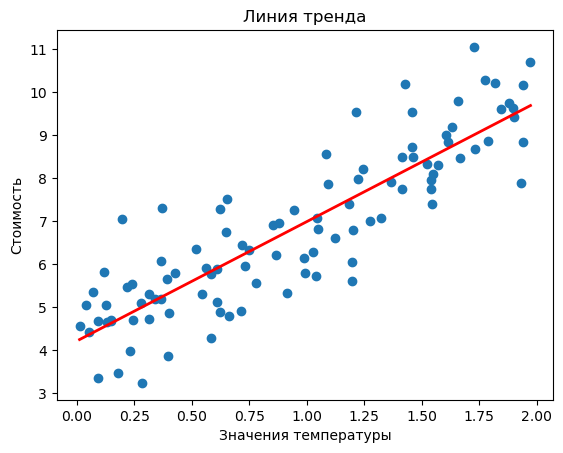

In [29]:
X_range =  np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
predictions = my_model.predict(X_range)
plt.scatter(X, Y)
plt.plot(X_range, predictions, "r-", linewidth=2, label='Предсказания')
plt.title('Линия тренда')
plt.xlabel("Значения температуры")
plt.ylabel("Стоимость")
plt.show()

## Линейная регрессия

[42500.]


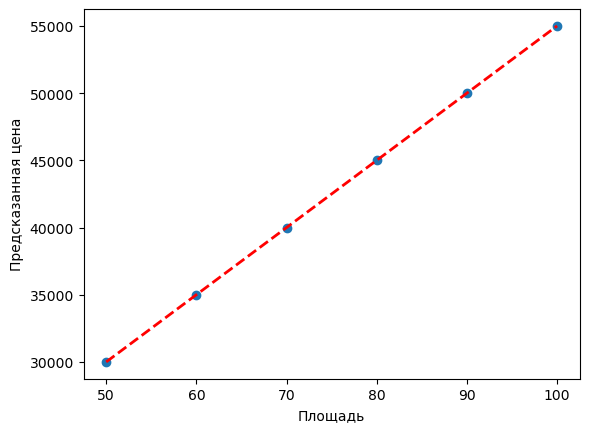

In [33]:
# Данные: площадь -> цена
X = np.array([50, 60, 70, 80, 90, 100]).reshape(-1, 1)  # м²
y = np.array([30000, 35000, 40000, 45000, 50000, 55000]) # $

# Твоя задача:
# 1. Обучить модель
# 2. Предсказать цену для квартиры 75 м²
# 3. Построить график с линией тренда
# 4. Сохранить модель в файл
model = LinearRegression()
model.fit(X, y)
predict = model.predict([[75]])
range_for_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
predictions = model.predict(range_for_plot)
print(predict)
plt.scatter(X, y)
plt.plot(range_for_plot, predictions, "r--", linewidth=2)
plt.xlabel("Площадь")
plt.ylabel("Предсказанная цена")
plt.show()

Предсказанная цена для 75 м²: 42500 $
Цена за 1 м²: 500 $
Базовая цена: 5000 $


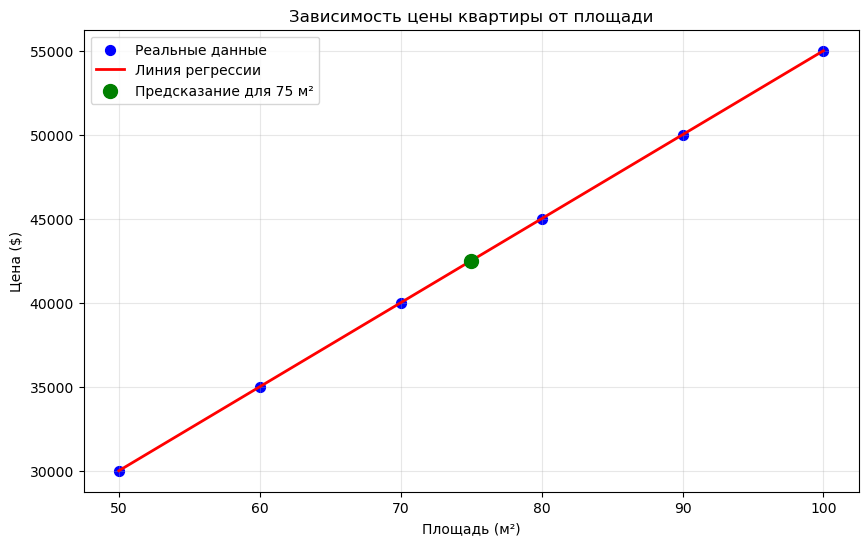

In [35]:
# Данные: площадь -> цена
X = np.array([50, 60, 70, 80, 90, 100]).reshape(-1, 1)  # м²
y = np.array([30000, 35000, 40000, 45000, 50000, 55000]) # $

# 1. Обучаем модель
model = LinearRegression()
model.fit(X, y)

# 2. Предсказываем цену для квартиры 75 м²
predict = model.predict([[75]])
print(f"Предсказанная цена для 75 м²: {predict[0]:.0f} $")

# Покажем параметры модели
print(f"Цена за 1 м²: {model.coef_[0]:.0f} $")
print(f"Базовая цена: {model.intercept_:.0f} $")

# 3. Строим график с линией тренда
range_for_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
predictions = model.predict(range_for_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Реальные данные', s=50)
plt.plot(range_for_plot, predictions, "r-", linewidth=2, label='Линия регрессии')
plt.scatter(75, predict[0], color='green', s=100, label='Предсказание для 75 м²', zorder=5)

plt.xlabel("Площадь (м²)")
plt.ylabel("Цена ($)")
plt.title("Зависимость цены квартиры от площади")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Сигмоида

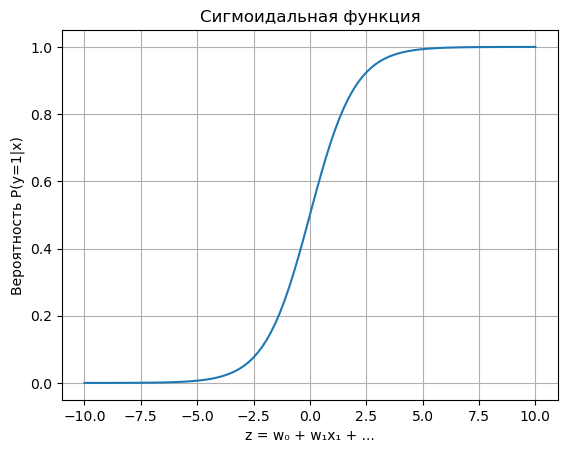

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Сигмоида сжимает любые числа в диапазон [0, 1]
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Пример
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.xlabel('z = w₀ + w₁x₁ + ...')
plt.ylabel('Вероятность P(y=1|x)')
plt.title('Сигмоидальная функция')
plt.grid(True)
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Данные: [часы_подготовки, посещаемость_в_долях]
X = np.array([
    [2, 0.3], [5, 0.8], [1, 0.1], [10, 0.9], [3, 0.4],
    [8, 0.7], [4, 0.6], [6, 0.5], [7, 0.8], [9, 0.9]
])
# Целевая переменная: 0 - не сдал, 1 - сдал
y = np.array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1])

# Создаем и обучаем модель
model = LogisticRegression()
model.fit(X, y)

# Делаем предсказания
new_student = np.array([[6, 0.7]])  # 6 часов подготовки, 70% посещаемости
probability = model.predict_proba(new_student)[0][1]  # Вероятность сдать
prediction = model.predict(new_student)               # Класс (0 или 1)

print(f"Вероятность сдать экзамен: {probability:.2%}")
print(f"Предсказание: {'Сдаст' if prediction[0] == 1 else 'Не сдаст'}")

# Посмотрим на параметры модели
print(f"\nВеса модели: {model.coef_}")
print(f"Смещение: {model.intercept_}")

Вероятность сдать экзамен: 94.96%
Предсказание: Сдаст

Веса модели: [[1.148096  0.1713603]]
Смещение: [-4.07283642]


## Моя моделька


In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
"""Для датафреймов"""
pd.set_option('display.max_columns', None)

In [138]:
df = pd.read_csv('bank-full.csv', sep=';')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [140]:
df.shape

(45211, 17)

In [141]:
df['y_count'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [142]:
a = df['y_count'].sum()
print(f'Количество депозитов: {a}')
print(f'Процент людей с депозитом: {np.round(a/len(df)*100, 2)}%')
print(f'Процент людей с депозитом: {(a/len(df)):.1%}')

Количество депозитов: 5289
Процент людей с депозитом: 11.7%
Процент людей с депозитом: 11.7%


In [143]:
print('poutcome:', df['poutcome'].unique(), 'Доля:', round(len(df[df['poutcome'] == 'unknown'])/len(df)*100,2),'%')
print('job', df['job'].unique(), 'Доля:', round(len(df[df['job'] == 'unknown'])/len(df)*100,2),'%')
print('marital', df['marital'].unique(), 'Доля:', round(len(df[df['marital'] == 'unknown'])/len(df)*100,2),'%')
print('education', df['education'].unique(), 'Доля:', round(len(df[df['education'] == 'unknown'])/len(df)*100,2),'%')
print('contact', df['contact'].unique(), 'Доля:', round(len(df[df['contact'] == 'unknown'])/len(df)*100,2),'%')

poutcome: ['unknown' 'failure' 'other' 'success'] Доля: 81.75 %
job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] Доля: 0.64 %
marital ['married' 'single' 'divorced'] Доля: 0.0 %
education ['tertiary' 'secondary' 'unknown' 'primary'] Доля: 4.11 %
contact ['unknown' 'cellular' 'telephone'] Доля: 28.8 %


In [144]:
"""1-yes, 0-no"""
df['default'] = df['default'].apply(lambda x: 1 if x == 'yes' else 0)
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

In [145]:
"""Проверка корреляции для признака 'poutcome' """
pd.crosstab(df['poutcome'], df['y'])

y,no,yes
poutcome,,
failure,4283,618
other,1533,307
success,533,978
unknown,33573,3386


In [146]:
def choose(x):
    if x == 'unknown':
        return 0
    elif x == 'success':
        return 1
    return -1

df['poutcome_count'] = df['poutcome'].apply(choose)

In [147]:
print(df['poutcome_count'].value_counts())

poutcome_count
 0    36959
-1     6741
 1     1511
Name: count, dtype: int64


In [148]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_count,poutcome_count
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no,0,0


In [149]:
"""Проверка корреляции для признака 'poutcome' """
pd.crosstab(df['education'], df['y'])

y,no,yes
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


In [150]:
"""Проверка корреляции для признака 'poutcome' """
pd.crosstab(df['contact'], df['y'])

y,no,yes
contact,,
cellular,24916,4369
telephone,2516,390
unknown,12490,530


In [151]:
"""Сделаем для education кодировку"""
def education_cod(x):
    if x == 'primary':
        return 1
    elif x == 'secondary':
        return 2
    elif x == 'tertiary':
        return 3
    return 0

df['education'] = df['education'].apply(education_cod)

In [152]:
"""Решил пока что исключить признак 'contact', из-за слабой дифференцированности переменной y """

"Решил пока что исключить признак 'contact', из-за слабой дифференцированности переменной y "

In [153]:
pd.crosstab(df['default'], df['y'])

y,no,yes
default,,
0,39159,5237
1,763,52


In [154]:
def balance_quantile(x):
    low, mid, upper = df['balance'].quantile([0.25, 0.5, 0.75])
    if x <= low:
        return 'очень низкий'
    elif x <= mid:
        return 'низкий'
    elif x <= upper:
        return 'средний'
    return 'высокий'
     

df['balance_group'] = df['balance'].apply(balance_quantile)

In [155]:
pd.crosstab(df['balance_group'], df['y'])

y,no,yes
balance_group,,
высокий,9472,1825
низкий,10061,1230
очень низкий,10498,819
средний,9891,1415


In [156]:
print(1825/9472*100)
print(100*1230/10061)
print(100*810/10498)
print(100*1415/9891)

19.26731418918919
12.225424908060829
7.7157553819775195
14.305934688100294


In [157]:
def balance_int(x):
    if x == 'очень низкий':
        return 1
    elif x == 'низкий':
        return 2
    elif x == 'средний':
        return 3
    return 4
     

df['balance_int'] = df['balance_group'].apply(balance_int)

In [158]:
def duration_quantile(x):
    low, mid, upper = df['duration'].quantile([0.25, 0.5, 0.75])
    if x <= low:
        return 'очень низкий'
    elif x <= mid:
        return 'низкий'
    elif x <= upper:
        return 'средний'
    return 'высокий'
     

df['duration_group'] = df['duration'].apply(duration_quantile)

In [159]:
pd.crosstab(df['duration_group'], df['y'])

y,no,yes
duration_group,,
высокий,7946,3315
низкий,10703,582
очень низкий,11248,127
средний,10025,1265


In [160]:
def duration_int(x):
    if x == 'очень низкий':
        return 1
    elif x == 'низкий':
        return 2
    elif x == 'средний':
        return 3
    return 4
     

df['duration_int'] = df['duration_group'].apply(duration_int)

In [161]:
def campaign_quantile(x):
    low, mid, upper = df['campaign'].quantile([0.25, 0.5, 0.75])
    if x <= low:
        return 'очень низкий'
    elif x <= mid:
        return 'низкий'
    elif x <= upper:
        return 'средний'
    return 'высокий'
     

df['campaign_group'] = df['campaign'].apply(campaign_quantile)

In [162]:
def campaign_int(x):
    if x == 'очень низкий':
        return 1
    elif x == 'низкий':
        return 2
    elif x == 'средний':
        return 3
    return 4
     

df['campaign_int'] = df['campaign_group'].apply(campaign_int)

In [163]:
pd.crosstab(df['campaign_group'], df['y'])

y,no,yes
campaign_group,,
высокий,8932,709
низкий,11104,1401
очень низкий,14983,2561
средний,4903,618


In [164]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_count,poutcome_count,balance_group,balance_int,duration_group,duration_int,campaign_group,campaign_int
0,58,management,married,3,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no,0,0,высокий,4,средний,3,очень низкий,1
1,44,technician,single,2,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no,0,0,очень низкий,1,низкий,2,очень низкий,1
2,33,entrepreneur,married,2,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no,0,0,очень низкий,1,очень низкий,1,очень низкий,1
3,47,blue-collar,married,0,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no,0,0,высокий,4,очень низкий,1,очень низкий,1
4,33,unknown,single,0,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no,0,0,очень низкий,1,средний,3,очень низкий,1


In [165]:
"""Пока в модель пойдут: age, job, education, default, balance_int, housing, loan, duration_int, campaign_int, poutcome_count"""

'Пока в модель пойдут: age, job, education, default, balance_int, housing, loan, duration_int, campaign_int, poutcome_count'

In [ ]:
"""Разделим на train и test выборку 80% к 20%"""
df_for_model = df[['age', 'job', 'education', 'default', 'balance_int', 'housing', 'loan', 'duration_int', 'campaign_int', 'poutcome_count', 'y_count']]

job_dummies = pd.get_dummies(df['job'], prefix='job', dtype=int)
df_for_model = pd.concat([df_for_model.drop('job', axis=1), job_dummies], axis=1)
print(job_dummies.columns.tolist())

train = df_for_model.sample(frac=0.8, random_state=42).reset_index(drop=True)
test = df_for_model.drop(train.index).reset_index(drop=True)

['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown']


In [167]:
print(f"Train size: {len(train)}")
print(f"Test size: {len(test)}")
print(f"Train target %: {train['y_count'].mean():.1%}")
print(f"Test target %: {test['y_count'].mean():.1%}")

Train size: 36169
Test size: 9042
Train target %: 11.7%
Test target %: 31.6%


In [168]:
"""Не подходит, так как в 3 раза распределение целевой переменной в тесте выше, а надо, чтобы было +- одинаково"""

'Не подходит, так как в 3 раза распределение целевой переменной в тесте выше, а надо, чтобы было +- одинаково'

In [173]:
df_for_model = df[['age', 'job', 'education', 'default', 'balance_int', 'housing', 'loan', 'duration_int', 'campaign_int', 'poutcome_count', 'y_count']]


job_dummies = pd.get_dummies(df['job'], prefix='job', dtype=int)
df_for_model = pd.concat([df_for_model.drop('job', axis=1), job_dummies], axis=1)
print(job_dummies.columns.tolist())

X = df_for_model.drop('y_count', axis=1)
y = df_for_model['y_count']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown']


In [174]:
print(f"Train size: {len(train)}")
print(f"Test size: {len(test)}")
print(f"Train target %: {train['y_count'].mean():.1%}")
print(f"Test target %: {test['y_count'].mean():.1%}")

Train size: 36168
Test size: 9043
Train target %: 11.7%
Test target %: 11.7%


In [321]:
class MyLogRegression():
    
    def __init__(self, learning_rate, n_iterations, lambda_param=1):
        self.w = None
        self.b = 0 # смещение
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.lambda_param = lambda_param  # ← новый параметр
        
        
    def fit(self, X, y):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float)
        cnt = X.shape[1]
        m = X.shape[0]
        w = np.random.randn(cnt) * 0.01

        for i in range(self.n_iterations):
            z = X @ w + self.b
            y_pred = self.sigmoid(z)
            # Добавляем регуляризацию в градиент:
            dw = (1/m) * (X.T @ (y_pred - y)) + (self.lambda_param / m) * w
            db = (1/m) * np.sum(y_pred - y)
            w = w - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db
            
        self.w = w   
        
        
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
            
        
    def predict(self, X):
        X = np.array(X, dtype=float)
        z = X @ self.w + self.b
        y_pred = self.sigmoid(z)
        return (y_pred > 0.45).astype(int)
    
    
    def predict_proba(self, X):
        X = np.array(X, dtype=float)
        z = X @ self.w + self.b
        return self.sigmoid(z)
        
    

In [322]:
model = MyLogRegression(learning_rate=0.001, n_iterations=2000)

# model.fit(X_train, y_train)

In [323]:
from sklearn.metrics import accuracy_score, f1_score

# y_pred = model.predict(X_test)
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
# print(f"F1-score: {f1_score(y_test, y_pred):.3f}")

In [324]:
"""Из-за дисбаланса классов модель плохо предсказывает"""

'Из-за дисбаланса классов модель плохо предсказывает'

In [325]:
"""Для того чтобы улучшить метрику F1 нам надо сбалансировать данные"""
"""В этом нам поможет undersampling"""

df_0 = train[train['y_count'] == 0]
df_1 = train[train['y_count'] == 1]

df_0_balanced = df_0.sample(n=len(df_1), random_state=42)
train_balanced = pd.concat([df_0_balanced, df_1])
train_balanced = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True) 

X_balanced = train_balanced.drop('y_count', axis=1)
y_balanced = train_balanced['y_count']

"""Добавим валидацию для подбора гипперпараметров"""
from sklearn.model_selection import train_test_split

X_train_bal, X_val, y_train_bal, y_val = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

# """Подберем лямбду"""
# from sklearn.model_selection import cross_val_score

# lambda_values = [0.001, 0.01, 0.1, 1, 10]
# best_f1 = 0
# best_lambda = 0

# for lambda_param in lambda_values:
#     model = MyLogRegression(learning_rate=0.01, n_iterations=1000, lambda_param=lambda_param)
    
#     # Простая валидация (без кросс-валидации для начала)
#     model.fit(X_train_bal, y_train_bal)
#     y_val_pred = model.predict(X_val)
#     f1 = f1_score(y_val, y_val_pred)
    
#     print(f"lambda={lambda_param}, F1={f1:.3f}")
    
#     if f1 > best_f1:
#         best_f1 = f1
#         best_lambda = lambda_param

# print(f"Лучшая lambda: {best_lambda}, F1: {best_f1:.3f}")


model.fit(X_train_bal, y_train_bal)

y_val_proba = model.predict_proba(X_val)

best_f1 = 0
best_threshold = 0

for threshold in np.arange(0.05, 0.5, 0.01):
    y_val_pred = (y_val_proba > threshold).astype(int)
    current_f1 = f1_score(y_val, y_val_pred)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"Лучший порог: {best_threshold:.2f}, F1 на валидации: {best_f1:.3f}")

# Проверяем на ТЕСТЕ с найденным порогом
y_test_proba = model.predict_proba(X_test)
y_test_pred = (y_test_proba > best_threshold).astype(int)
test_f1 = f1_score(y_test, y_test_pred)
print(f"F1 на тесте: {test_f1:.3f}")

Лучший порог: 0.45, F1 на валидации: 0.755
F1 на тесте: 0.314


In [262]:
"""Обучим модель на сбалансированной выборке"""
# model.fit(X_balanced, y_balanced)

'Обучим модель на сбалансированной выборке'

In [326]:
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred):.3f}")

Accuracy: 0.534
F1-score: 0.314


In [ ]:
"""Вывод: градиентный спуск не подоходит для этой задачи. Потэтому оставлю как есть и перейду к изучению других тем и алгоритмов"""

## Задача со степика

In [1]:
import numpy as np


def func(x):
    return -0.5 * x + 0.2 * x ** 2 - 0.01 * x ** 3 - 0.3 * np.sin(4*x)


def grad(x):
    return -0.5 + 0.4 * x - 0.03 * x ** 2 - 0.3 * 4 * np.cos(4*x)


n = 0.1
x_grad = x_momentum = -3.5  # результат (точка минимума)
N = 200
v = 0.8
u = 0

for i in range(N):
	u = v*u + (1-v)*n*grad(x_momentum)  # формула
	x_momentum = x_momentum - u
 
print(np.round(x_momentum, 2) , "Это momentum")

for i in range(N):
	x_grad = x_grad - n*grad(x_grad)  # формула
	
print(np.round(x_grad, 2), "Это градиентный спуск")

0.46 Это momentum
-0.96 Это градиентный спуск


In [ ]:
"""Теперь для верхней функции построим интерактивный график и сравним обычный графиентный спуск с momentum"""
import matplotlib.pyplot as plt
import numpy as np


def func(x):
    return -0.5 * x + 0.2 * x ** 2 - 0.01 * x ** 3 - 0.3 * np.sin(4*x)


def grad(x):
    return -0.5 + 0.4 * x - 0.03 * x ** 2 - 0.3 * 4 * np.cos(4*x)


plt.ion()
fig, ax = plt.subplots(figsize=(15, 6))
x_plot = np.linspace(-5, 6, 100)
ax.plot(x_plot, func(x_plot), 'k', label='f(x)', linewidth=2)
ax.grid(True, alpha=0.3)
x_grad = x_momentum = -3.5
point_momentum, = ax.plot([x_momentum], [func(x_momentum)], 'ro', markersize=10, label='Метод импульсов')
point_grad, = ax.plot([x_grad], [func(x_grad)], 'bo', markersize=10, label='Градиентный спуск')
ax.legend()
plt.show()

for step in range(N):
	u = v*u + (1-v)*n*grad(x_momentum)  # запятая это распаковка кортежа
	x_momentum = x_momentum - u

	x_grad = x_grad - n*grad(x_grad)
	
	point_momentum.set_data([x_momentum], [func(x_momentum)])
	point_grad.set_data([x_grad], [func(x_grad)])
	
	fig.canvas.draw()
	plt.pause(0.4)
 
plt.ioff()

## Еще одна задача со степика

In [3]:
import numpy as np


def func(x):
    return 0.4 * x + 0.1 * np.sin(2*x) + 0.2 * np.cos(3*x)

def grad(x):
    return 0.4 + 0.1 * np.cos(2*x) * 2 - 0.2 * np.sin(3*x) * 3


n = 1
x = x_grad = 4
N = 500
v = 0.7
u = 0

for step in range(N):
    u = v * u + (1 - v) * n * grad(x - v * u)
    x -= u
    
    x_grad -= n*grad(x_grad)
print(x)
print(x_grad)

0.8117183975270705
2.7617998135169746


## Еще одна задача со степика

In [6]:
import numpy as np


def func(x):
    return 2 * x + 0.1 * x ** 3 + 2 * np.cos(3*x)

def grad(x):
    return 2 + 0.1 * 3 * x ** 2 - 2 * 3 * np.sin(3*x)
    

n = 0.5
x = 4
N = 200
a = 0.8 
G = 0
e = 0.01

for step in range(N):
    G = a * G + (1 - a) * grad(x) * grad(x)
    x -= n * (grad(x) / (np.sqrt(G) + e))
    
print(x)

0.6193324724910274


In [3]:
# Пример данных
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([1.2, 1.9, 3.2, 3.8, 5.1, 6.2, 7.1, 7.9])

# Вычисляем необходимые суммы
n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x**2)

# Вычисляем коэффициенты по формулам МНК
b = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
a = (sum_y - b * sum_x) / n

print(f"Уравнение регрессии: y = {a:.3f} + {b:.3f}x")
print(f"Коэффициент a (intercept): {a:.3f}")
print(f"Коэффициент b (slope): {b:.3f}")

Уравнение регрессии: y = 0.093 + 0.990x
Коэффициент a (intercept): 0.093
Коэффициент b (slope): 0.990


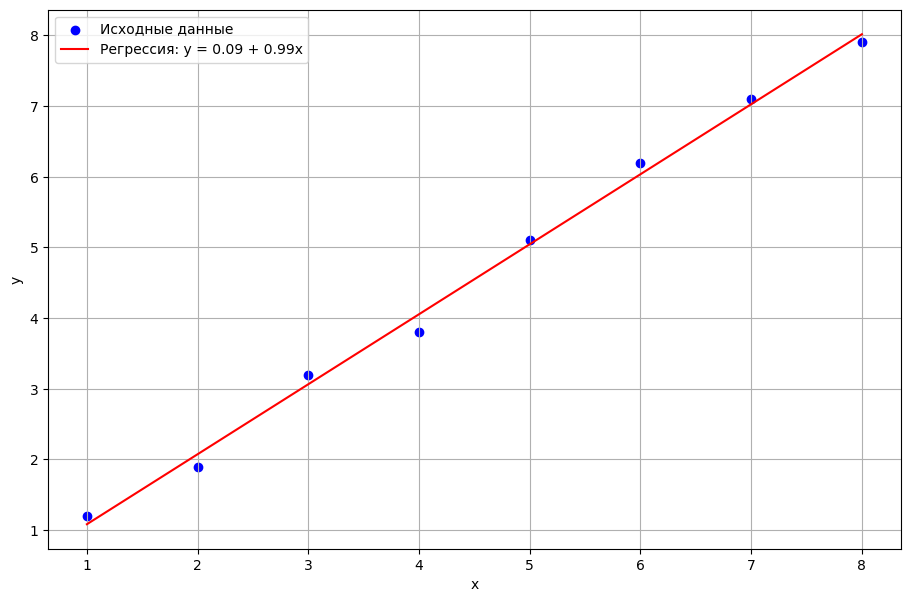

In [4]:
# Предсказанные значения
y_pred = a + b * x

# Визуализация
plt.figure(figsize=(11, 7))
plt.scatter(x, y, color='blue', label='Исходные данные')
plt.plot(x, y_pred, color='red', label=f'Регрессия: y = {a:.2f} + {b:.2f}x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

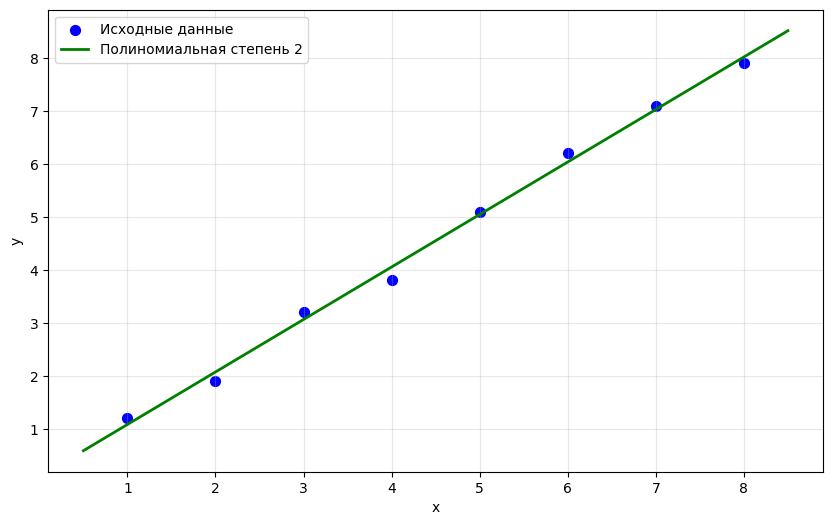

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Полиномиальная регрессия 2-й степени
degree = 2
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('linear', LinearRegression())
])

poly_model.fit(x.reshape(-1, 1), y)

# Предсказание для гладкой кривой
x_smooth = np.linspace(min(x)-0.5, max(x)+0.5, 100)
y_poly = poly_model.predict(x_smooth.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Исходные данные', s=50)
plt.plot(x_smooth, y_poly, 'g-', linewidth=2, label=f'Полиномиальная степень {degree}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

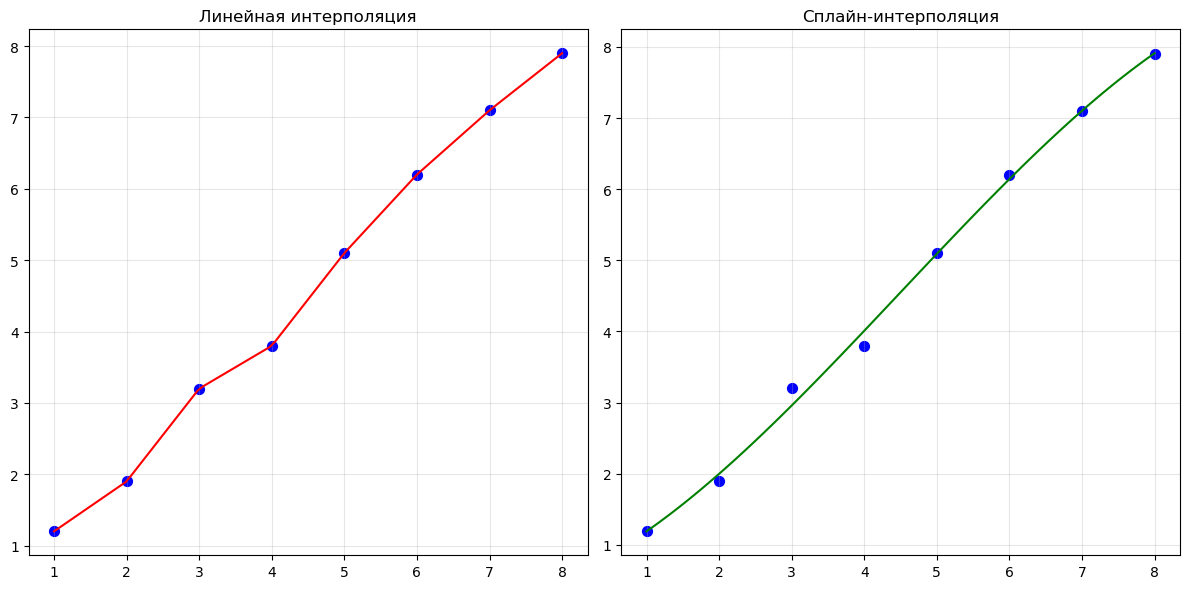

In [6]:
from scipy.interpolate import interp1d, UnivariateSpline

# Линейная интерполяция
f_linear = interp1d(x, y, kind='linear')
x_smooth = np.linspace(min(x), max(x), 100)
y_linear = f_linear(x_smooth)

# Сплайн-интерполяция
spline = UnivariateSpline(x, y, s=0.5)
y_spline = spline(x_smooth)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', s=50)
plt.plot(x_smooth, y_linear, 'r-', label='Линейная интерполяция')
plt.title('Линейная интерполяция')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(x, y, color='blue', s=50)
plt.plot(x_smooth, y_spline, 'g-', label='Сплайн-интерполяция')
plt.title('Сплайн-интерполяция')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

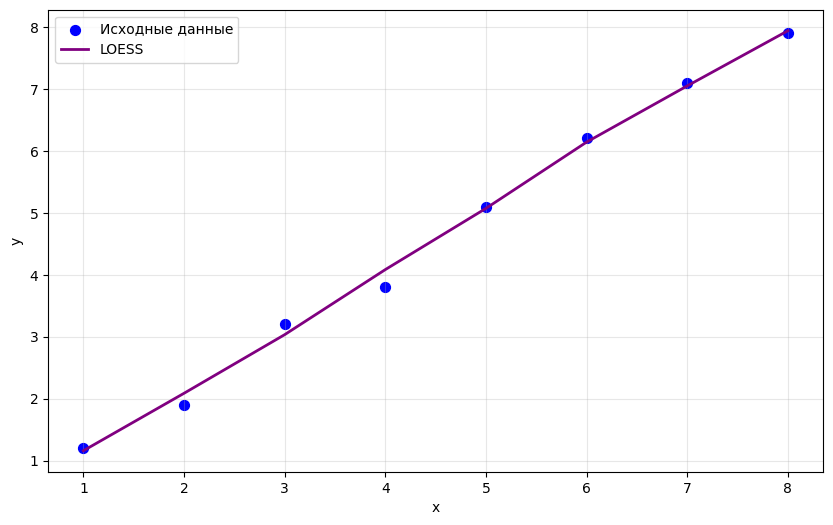

In [8]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# LOESS регрессия
loess_sm = lowess(y, x, frac=0.7)  # frac - параметр сглаживания

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Исходные данные', s=50)
plt.plot(loess_sm[:, 0], loess_sm[:, 1], 'purple', linewidth=2, label='LOESS')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

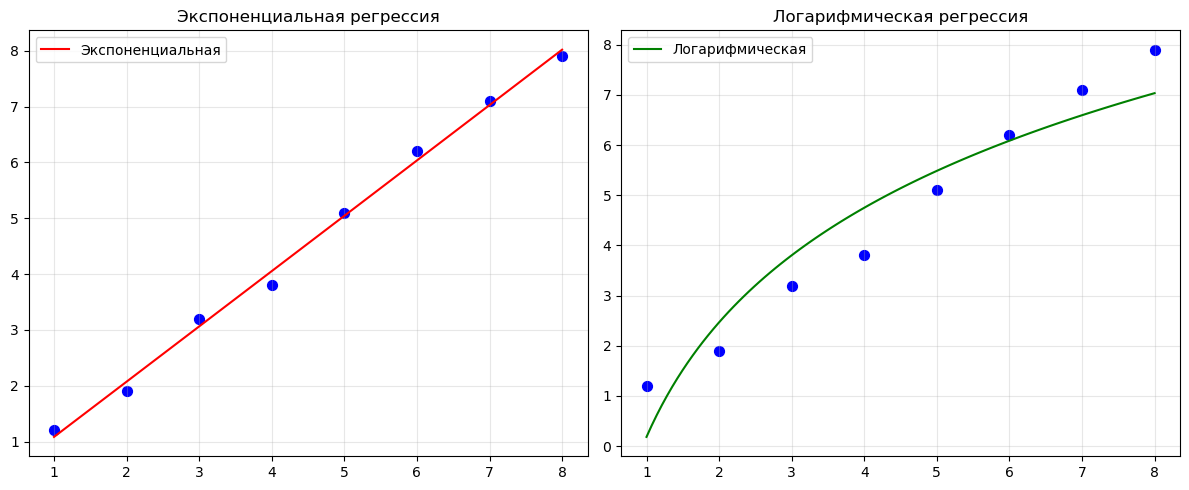

In [9]:
from scipy.optimize import curve_fit

# Экспоненциальная функция
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Логарифмическая функция  
def log_func(x, a, b):
    return a * np.log(x) + b

# Подбираем параметры
try:
    popt_exp, _ = curve_fit(exp_func, x, y, maxfev=5000)
    popt_log, _ = curve_fit(log_func, x, y)
    
    x_smooth = np.linspace(min(x), max(x), 100)
    y_exp = exp_func(x_smooth, *popt_exp)
    y_log = log_func(x_smooth, *popt_log)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, color='blue', s=50)
    plt.plot(x_smooth, y_exp, 'r-', label='Экспоненциальная')
    plt.title('Экспоненциальная регрессия')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.scatter(x, y, color='blue', s=50)
    plt.plot(x_smooth, y_log, 'g-', label='Логарифмическая')
    plt.title('Логарифмическая регрессия')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Ошибка подбора: {e}")

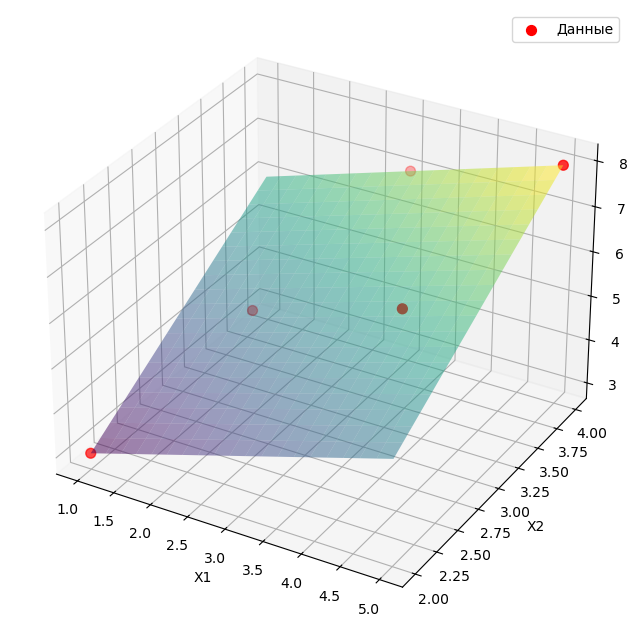

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Если есть 2 независимые переменные
x1 = np.array([1, 2, 3, 4, 5])
x2 = np.array([2, 3, 4, 3, 4])
y = np.array([3, 5, 7, 6, 8])

# Поверхность регрессии
X1, X2 = np.meshgrid(np.linspace(min(x1), max(x1), 20), 
                     np.linspace(min(x2), max(x2), 20))

# Множественная линейная регрессия
X = np.column_stack([x1, x2])
model_3d = LinearRegression()
model_3d.fit(X, y)

Z = model_3d.intercept_ + model_3d.coef_[0]*X1 + model_3d.coef_[1]*X2

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, color='red', s=50, label='Данные')
ax.plot_surface(X1, X2, Z, alpha=0.5, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.legend()
plt.show()

## Нейроны

In [11]:
import numpy as np

class SimpleNeuron:
    def __init__(self, num_inputs):
        self.weights = np.random.randn(num_inputs)  # Веса
        self.bias = np.random.randn()               # Смещение
    
    def forward(self, inputs):
        # Взвешенная сумма
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Функция активации
        output = self.activation(weighted_sum)
        return output
    
    def activation(self, x):
        return 1 / (1 + np.exp(-x))  # Сигмоида

In [12]:
# Нейрон И (AND)
and_neuron = SimpleNeuron(2)
and_neuron.weights = np.array([0.5, 0.5])
and_neuron.bias = -0.7

# Тестируем
inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
for inp in inputs:
    output = and_neuron.forward(inp)
    print(f"AND {inp} → {output:.3f} → {int(output > 0.5)}")

AND [0, 0] → 0.332 → 0
AND [0, 1] → 0.450 → 0
AND [1, 0] → 0.450 → 0
AND [1, 1] → 0.574 → 1


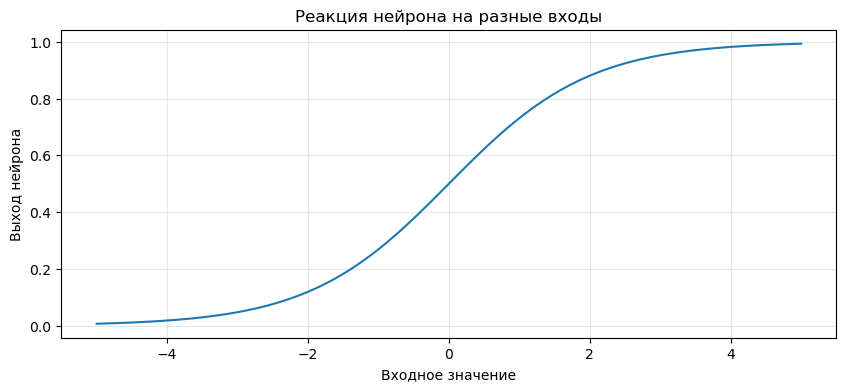

In [13]:
import matplotlib.pyplot as plt

# Создаем нейрон для распознавания положительных чисел
neuron = SimpleNeuron(1)
neuron.weights = np.array([1.0])
neuron.bias = 0.0

# Тестируем на разных числах
test_numbers = np.linspace(-5, 5, 100)
outputs = [neuron.forward([x]) for x in test_numbers]

plt.figure(figsize=(10, 4))
plt.plot(test_numbers, outputs)
plt.title('Реакция нейрона на разные входы')
plt.xlabel('Входное значение')
plt.ylabel('Выход нейрона')
plt.grid(True, alpha=0.3)
plt.show()

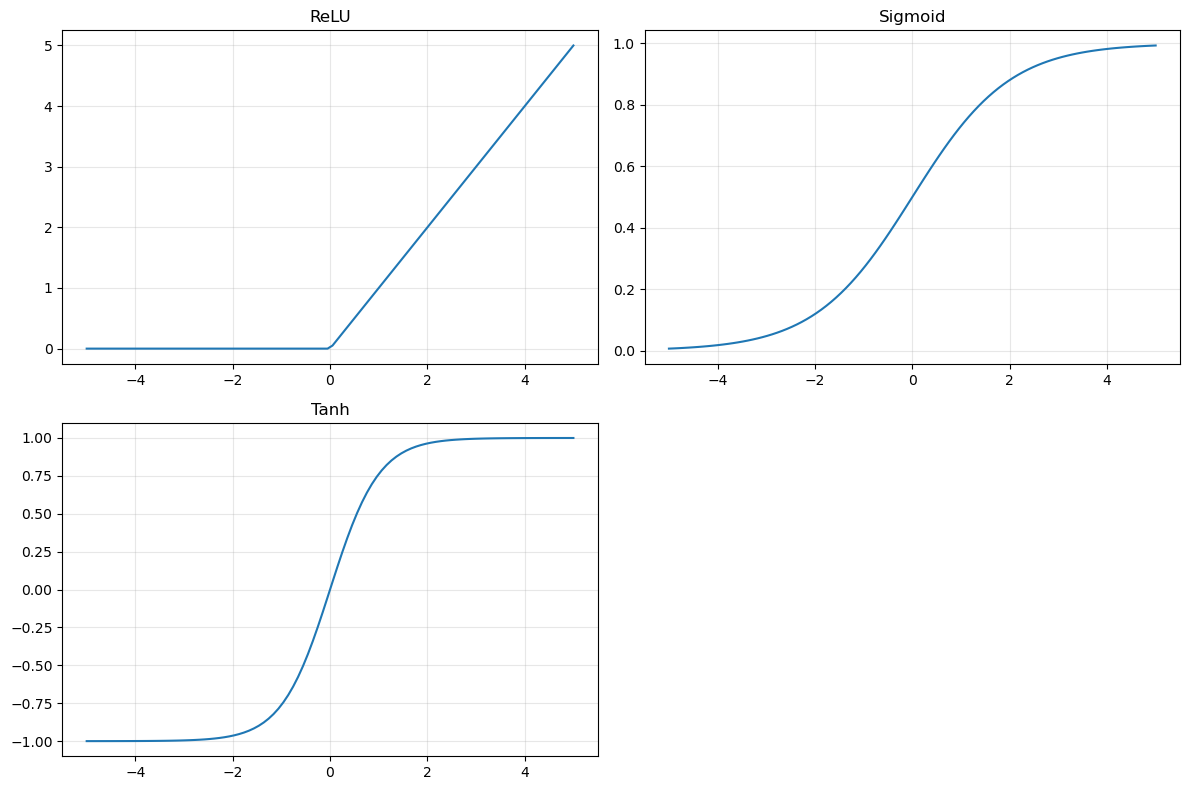

In [14]:
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Для численной стабильности
    return exp_x / np.sum(exp_x)

# Визуализация функций активации
x = np.linspace(-5, 5, 100)
plt.figure(figsize=(12, 8))

functions = [('ReLU', relu), ('Sigmoid', sigmoid), ('Tanh', tanh)]
for i, (name, func) in enumerate(functions, 1):
    plt.subplot(2, 2, i)
    plt.plot(x, func(x))
    plt.title(name)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()